In [110]:
import pandas as pd
import numpy as np
import os
import pickle
import plotly.express as px
import re
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



from sklearn.model_selection import validation_curve, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import learning_curve, validation_curve

- raw4_3 with raw features all without std and norm

In [111]:
df =  pd.read_csv('../DataSet/DataSet_Clean.csv')

df.head(3)

,Date,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01-06-2012,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02-06-2012,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,03-06-2012,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire


In [112]:
df = df.drop(['Date','day','year','month','Classes'], axis=1)


df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [113]:
df['ISI/FFMC'] = df['ISI']/df['FFMC']
df['ISI/DMC*BUI'] = df['ISI']/df['DMC']/df['BUI']
#df_feature['ISI/FWI'] = df_feature['ISI']/df_feature['FWI']
#df['ISI/BUI'] = df['ISI']/df['BUI']

##############################

###################################
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,ISI/FFMC,ISI/DMC*BUI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.019787,0.112457
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.015528,0.062539
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.006369,0.044444
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.000000,0.000000
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.018519,0.102564


In [114]:
X = df.drop(['FWI','FFMC','DMC','DC','ISI','BUI'],axis=1)   ########### Raw4_4

#X = df.drop(['FWI','FFMC','DMC','DC','ISI','BUI','Ws','Rain'],axis=1)   ########### Raw4_6

#X = df.drop(['FWI','FFMC','DMC','ISI','BUI'],axis=1)       ############### raw4_5

y= df['FWI']

In [115]:
X.head()

,Temperature,RH,Ws,Rain,ISI/FFMC,ISI/DMC*BUI
0,29,57,18,0.0,0.019787,0.112457
1,29,61,13,1.3,0.015528,0.062539
2,26,82,22,13.1,0.006369,0.044444
3,25,89,13,2.5,0.000000,0.000000
4,27,77,16,0.0,0.018519,0.102564


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)






In [117]:
from sklearn.preprocessing import StandardScaler

fitted_scaler = StandardScaler().fit(X_train)


#fitted_scaler = Normalizer().fit(X_train_dropped)


X_train_scaled = fitted_scaler.transform(X_train)
X_test_scaled = fitted_scaler.transform(X_test)

#############################

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [118]:
X_train_scaled_df.head()
#y_train.head()

,Temperature,RH,Ws,Rain,ISI/FFMC,ISI/DMC*BUI
0,0.521402,-1.345393,-0.173301,0.381169,-0.599412,-0.526956
1,1.317554,-0.406104,-1.527837,-0.386481,0.126347,0.051823
2,0.786786,0.399000,0.165333,-0.386481,0.079646,0.212399
3,0.256018,0.264816,-0.511935,-0.386481,0.263354,-0.665448
4,0.786786,-1.882129,0.503967,-0.386481,2.178441,-0.439976


<AxesSubplot: xlabel='ISI/FFMC', ylabel='Density'>

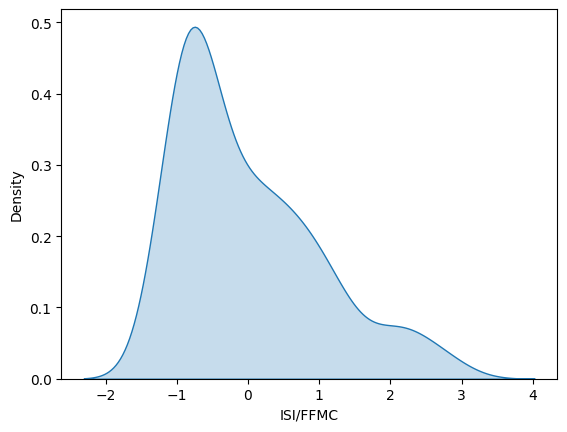

In [119]:
import seaborn as sns
sns.kdeplot(X_train_scaled_df,x='ISI/FFMC',fill=True)

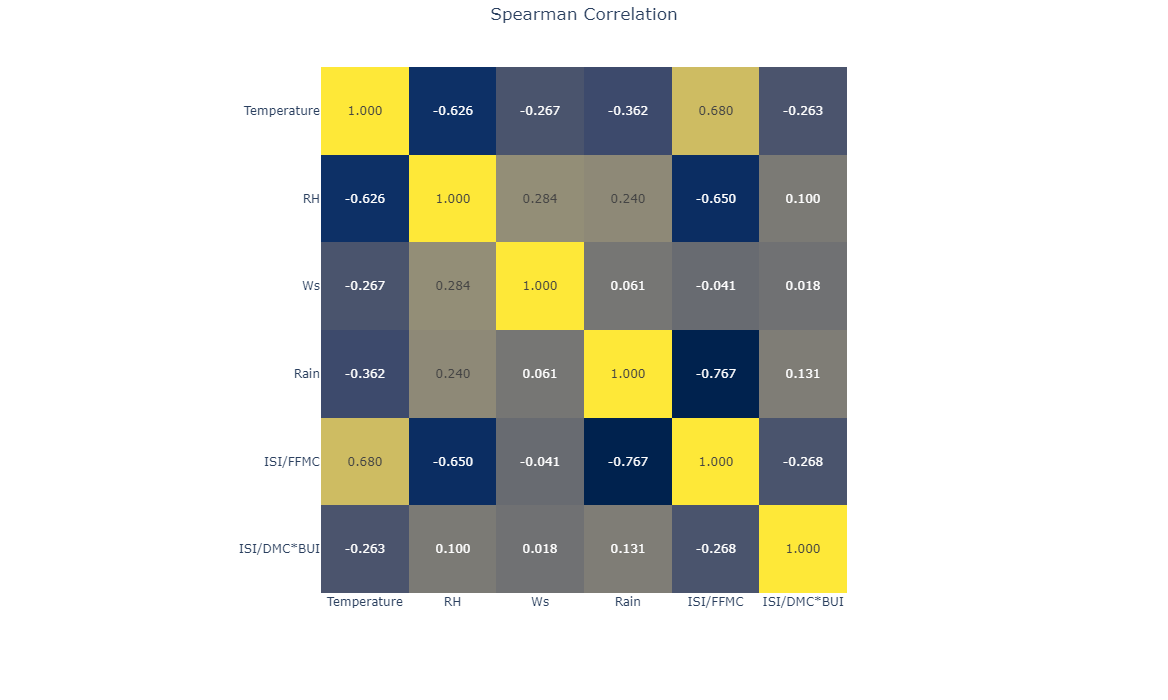

In [120]:
# FWI is calculated from FFMC, DMC and ISI and is the world wide accepted indx for fire prediction

df2=X_train_scaled_df.copy()

#df2=X_train.copy()


######################################################

fig = px.imshow(df2.corr(method='spearman',numeric_only=True),text_auto='.3f',color_continuous_scale='Cividis',
          title='Spearman Correlation')
fig.update_coloraxes(showscale=False)
fig.update_layout(margin=dict(t=40,pad=0),
                  title_x=0.5,
                  height=700,width=700,
                  paper_bgcolor = "rgba(0,0,0,0)",
                    plot_bgcolor = "rgba(0,0,0,0)",                  
                    margin_autoexpand=True,
                    font=dict(size = 12))

fig.update_yaxes(automargin=True)


fig.show()
#######################
pio.write_html(fig,file ='../Regression/tuned_models_raw4_4/Corerlation_engineered.html')

# Model

In [102]:
clfs = {

    'LinearReg': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(), 
    'DecisionTreeReg': DecisionTreeRegressor(),
    'RandomForestReg': RandomForestRegressor()
}

In [103]:
param_grid = {
    
    'SVR': {'C':[10e-3,10e-2,10e-1,1.0,5,10],
           'kernel':['linear','rbf','sigmoid','poly'],
           #'gamma':['scale','auto']
           },
    
    
    'RandomForestReg': {'n_estimators':[100,300,500],
                        'criterion':['squared_error','friedman_mse'],
                        'max_depth':[2,4,5,6,8,10,15,20,None],
                        'random_state':[100],
                       },
    
    'DecisionTreeReg': {'criterion':['squared_error','friedman_mse'],
                        'max_depth':[2,4,5,6,8,10,15,20,None],
                        'random_state':[100],
                       },
    
    'Ridge': {'alpha': [1,0.1,0.01,0.001,5],                
                'fit_intercept': [True,False]                
               },
    
    'LinearReg':{'fit_intercept': [True, False],
              
                },
    
    'Lasso':{'alpha':[1,0.1, 0.01, 0.001,5],
              'max_iter':[1000,5000],               
               'random_state':[100],
             },
    'ElasticNet': {'alpha': [0.001,0.01, 0.1, 1,0],
              'l1_ratio': [0,0.2 ,0.3, 0.5, 0.8, 0.9,1],
              'max_iter':[5000,6000,7000],
              'fit_intercept':[True,False]
             
             }
    
    
           
    }

In [104]:
def train_classifier(clf,parameters):
    
    gs = GridSearchCV(clf,param_grid=parameters, cv=5,refit='r2', verbose=3,
                      scoring=['neg_mean_squared_error','r2'],
                      error_score='raise').fit(X_train_scaled_df, y_train)
    
    #y_pred = gs.predict(X_test)    
    
    
    return gs

In [105]:
tuned_models = []

for name,clf in clfs.items():
    
    print("\nFor ",name)
    parameters = param_grid[name]
    current_best_model = train_classifier(clf,parameters)
    
    ####### Saving Trainined MOdel #####################
    
    # create the directory if it does not exist
    if not os.path.exists('../Regression/tuned_models_raw4_4'):
        os.makedirs('../Regression/tuned_models_raw4_4')

    filename = 'tuned_' + re.search(r'^[^\(]+', str(current_best_model.best_estimator_))[0] + '_model.pkl'
    filepath = os.path.join('../Regression/tuned_models_raw4_4', filename)
    with open(filepath, 'wb') as file:
        pickle.dump(current_best_model, file)
            
    ##############################################################################
    
    tuned_models.append(current_best_model)


For  LinearReg
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END fit_intercept=True; neg_mean_squared_error: (test=-3.416) r2: (test=0.936) total time=   0.0s
[CV 2/5] END fit_intercept=True; neg_mean_squared_error: (test=-8.423) r2: (test=0.895) total time=   0.0s
[CV 3/5] END fit_intercept=True; neg_mean_squared_error: (test=-8.665) r2: (test=0.872) total time=   0.0s
[CV 4/5] END fit_intercept=True; neg_mean_squared_error: (test=-4.714) r2: (test=0.906) total time=   0.0s
[CV 5/5] END fit_intercept=True; neg_mean_squared_error: (test=-4.462) r2: (test=0.860) total time=   0.0s
[CV 1/5] END fit_intercept=False; neg_mean_squared_error: (test=-56.516) r2: (test=-0.066) total time=   0.0s
[CV 2/5] END fit_intercept=False; neg_mean_squared_error: (test=-59.240) r2: (test=0.261) total time=   0.0s
[CV 3/5] END fit_intercept=False; neg_mean_squared_error: (test=-68.388) r2: (test=-0.010) total time=   0.0s
[CV 4/5] END fit_intercept=False; neg_mean_squared_error: (t

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.081e+02, tolerance: 8.111e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.245e+02, tolerance: 7.276e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

[CV 1/5] END alpha=0.001, fit_intercept=True, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-3.408) r2: (test=0.936) total time=   0.0s
[CV 2/5] END alpha=0.001, fit_intercept=True, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-8.429) r2: (test=0.895) total time=   0.0s
[CV 3/5] END alpha=0.001, fit_intercept=True, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-8.686) r2: (test=0.872) total time=   0.0s
[CV 4/5] END alpha=0.001, fit_intercept=True, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-4.708) r2: (test=0.906) total time=   0.0s
[CV 5/5] END alpha=0.001, fit_intercept=True, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-4.453) r2: (test=0.860) total time=   0.0s
[CV 1/5] END alpha=0.001, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-3.408) r2: (test=0.936) total time=   0.0s
[CV 2/5] END alpha=0.001, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-8.429) r2: (te

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.932e+02, tolerance: 8.233e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.940e+02, tolerance: 8.725e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

[CV 4/5] END alpha=0.001, fit_intercept=True, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-4.708) r2: (test=0.906) total time=   0.0s
[CV 5/5] END alpha=0.001, fit_intercept=True, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-4.453) r2: (test=0.860) total time=   0.0s
[CV 1/5] END alpha=0.001, fit_intercept=True, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-3.409) r2: (test=0.936) total time=   0.0s
[CV 2/5] END alpha=0.001, fit_intercept=True, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-8.428) r2: (test=0.895) total time=   0.0s
[CV 3/5] END alpha=0.001, fit_intercept=True, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-8.682) r2: (test=0.872) total time=   0.0s
[CV 4/5] END alpha=0.001, fit_intercept=True, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-4.709) r2: (test=0.906) total time=   0.0s
[CV 5/5] END alpha=0.001, fit_intercept=True, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-4.45

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.774e+03, tolerance: 1.417e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.697e+03, tolerance: 1.385e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

[CV 1/5] END alpha=0.001, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-56.497) r2: (test=-0.066) total time=   0.0s
[CV 2/5] END alpha=0.001, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-59.266) r2: (test=0.261) total time=   0.0s
[CV 3/5] END alpha=0.001, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-68.419) r2: (test=-0.011) total time=   0.0s
[CV 4/5] END alpha=0.001, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-55.871) r2: (test=-0.120) total time=   0.0s
[CV 5/5] END alpha=0.001, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-55.350) r2: (test=-0.739) total time=   0.0s
[CV 1/5] END alpha=0.001, fit_intercept=False, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-56.497) r2: (test=-0.066) total time=   0.0s
[CV 2/5] END alpha=0.001, fit_intercept=False, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (te

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.774e+03, tolerance: 1.417e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.697e+03, tolerance: 1.385e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

[CV 1/5] END alpha=0.001, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-56.497) r2: (test=-0.066) total time=   0.0s
[CV 2/5] END alpha=0.001, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-59.266) r2: (test=0.261) total time=   0.0s
[CV 3/5] END alpha=0.001, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-68.419) r2: (test=-0.011) total time=   0.0s
[CV 4/5] END alpha=0.001, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-55.871) r2: (test=-0.120) total time=   0.0s
[CV 5/5] END alpha=0.001, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-55.350) r2: (test=-0.739) total time=   0.0s
[CV 1/5] END alpha=0.001, fit_intercept=False, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-56.499) r2: (test=-0.066) total time=   0.0s
[CV 2/5] END alpha=0.001, fit_intercept=False, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error:

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.455e+02, tolerance: 8.111e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.602e+02, tolerance: 7.276e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

[CV 2/5] END alpha=0.01, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-8.497) r2: (test=0.894) total time=   0.0s
[CV 3/5] END alpha=0.01, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-8.875) r2: (test=0.869) total time=   0.0s
[CV 4/5] END alpha=0.01, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-4.671) r2: (test=0.906) total time=   0.0s
[CV 5/5] END alpha=0.01, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-4.386) r2: (test=0.862) total time=   0.0s
[CV 1/5] END alpha=0.01, fit_intercept=True, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-3.355) r2: (test=0.937) total time=   0.0s
[CV 2/5] END alpha=0.01, fit_intercept=True, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-8.497) r2: (test=0.894) total time=   0.0s
[CV 3/5] END alpha=0.01, fit_intercept=True, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-8.875) r2: (test=0.86

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.812e+03, tolerance: 1.417e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.730e+03, tolerance: 1.385e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

[CV 1/5] END alpha=0.01, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-56.343) r2: (test=-0.063) total time=   0.0s
[CV 2/5] END alpha=0.01, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-59.505) r2: (test=0.258) total time=   0.0s
[CV 3/5] END alpha=0.01, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-68.701) r2: (test=-0.015) total time=   0.0s
[CV 4/5] END alpha=0.01, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-55.310) r2: (test=-0.109) total time=   0.0s
[CV 5/5] END alpha=0.01, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-55.465) r2: (test=-0.743) total time=   0.0s
[CV 1/5] END alpha=0.01, fit_intercept=False, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-56.343) r2: (test=-0.063) total time=   0.0s
[CV 2/5] END alpha=0.01, fit_intercept=False, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-59.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.838e+03, tolerance: 1.657e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.812e+03, tolerance: 1.417e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

[CV 5/5] END alpha=0.01, fit_intercept=False, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-55.465) r2: (test=-0.743) total time=   0.0s
[CV 1/5] END alpha=0.01, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-56.343) r2: (test=-0.063) total time=   0.0s
[CV 2/5] END alpha=0.01, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-59.505) r2: (test=0.258) total time=   0.0s
[CV 3/5] END alpha=0.01, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-68.701) r2: (test=-0.015) total time=   0.0s
[CV 4/5] END alpha=0.01, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-55.310) r2: (test=-0.109) total time=   0.0s
[CV 5/5] END alpha=0.01, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-55.465) r2: (test=-0.743) total time=   0.0s
[CV 1/5] END alpha=0.01, fit_intercept=False, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-5

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.519e+02, tolerance: 8.111e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.508e+02, tolerance: 7.276e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

[CV 1/5] END alpha=0.1, fit_intercept=True, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-3.578) r2: (test=0.933) total time=   0.0s
[CV 2/5] END alpha=0.1, fit_intercept=True, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-9.837) r2: (test=0.877) total time=   0.0s
[CV 3/5] END alpha=0.1, fit_intercept=True, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-11.170) r2: (test=0.835) total time=   0.0s
[CV 4/5] END alpha=0.1, fit_intercept=True, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-5.323) r2: (test=0.893) total time=   0.0s
[CV 5/5] END alpha=0.1, fit_intercept=True, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-4.520) r2: (test=0.858) total time=   0.0s
[CV 1/5] END alpha=0.1, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-3.578) r2: (test=0.933) total time=   0.0s
[CV 2/5] END alpha=0.1, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-9.837) r2: (test=0.877) tot

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.322e+02, tolerance: 8.233e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.393e+02, tolerance: 8.725e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

[CV 4/5] END alpha=0.1, fit_intercept=True, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-5.323) r2: (test=0.893) total time=   0.0s
[CV 5/5] END alpha=0.1, fit_intercept=True, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-4.520) r2: (test=0.858) total time=   0.0s
[CV 1/5] END alpha=0.1, fit_intercept=True, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-3.452) r2: (test=0.935) total time=   0.0s
[CV 2/5] END alpha=0.1, fit_intercept=True, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-9.534) r2: (test=0.881) total time=   0.0s
[CV 3/5] END alpha=0.1, fit_intercept=True, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-10.715) r2: (test=0.842) total time=   0.0s
[CV 4/5] END alpha=0.1, fit_intercept=True, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-5.079) r2: (test=0.898) total time=   0.0s
[CV 5/5] END alpha=0.1, fit_intercept=True, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-4.449) r2: (test=

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.124e+03, tolerance: 1.417e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.000e+03, tolerance: 1.385e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

[CV 1/5] END alpha=0.1, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-56.046) r2: (test=-0.057) total time=   0.0s
[CV 2/5] END alpha=0.1, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-62.089) r2: (test=0.226) total time=   0.0s
[CV 3/5] END alpha=0.1, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-71.709) r2: (test=-0.059) total time=   0.0s
[CV 4/5] END alpha=0.1, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-52.130) r2: (test=-0.045) total time=   0.0s
[CV 5/5] END alpha=0.1, fit_intercept=False, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-56.537) r2: (test=-0.777) total time=   0.0s
[CV 1/5] END alpha=0.1, fit_intercept=False, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-56.046) r2: (test=-0.057) total time=   0.0s
[CV 2/5] END alpha=0.1, fit_intercept=False, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-62.089) r2

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.731e+03, tolerance: 7.588e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.983e+03, tolerance: 8.725e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

[CV 3/5] END alpha=1, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-26.839) r2: (test=0.604) total time=   0.0s
[CV 4/5] END alpha=1, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-13.906) r2: (test=0.721) total time=   0.0s
[CV 5/5] END alpha=1, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-10.560) r2: (test=0.668) total time=   0.0s
[CV 1/5] END alpha=1, fit_intercept=True, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-12.406) r2: (test=0.766) total time=   0.0s
[CV 2/5] END alpha=1, fit_intercept=True, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-24.663) r2: (test=0.692) total time=   0.0s
[CV 3/5] END alpha=1, fit_intercept=True, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-26.839) r2: (test=0.604) total time=   0.0s
[CV 4/5] END alpha=1, fit_intercept=True, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-13.906) r2: (test=0.721) total time=

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.272e+03, tolerance: 1.417e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.069e+03, tolerance: 1.385e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

[CV 5/5] END alpha=1, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-56.582) r2: (test=-0.778) total time=   0.0s
[CV 1/5] END alpha=1, fit_intercept=False, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-67.590) r2: (test=-0.275) total time=   0.0s
[CV 2/5] END alpha=1, fit_intercept=False, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-77.680) r2: (test=0.031) total time=   0.0s
[CV 3/5] END alpha=1, fit_intercept=False, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-89.070) r2: (test=-0.316) total time=   0.0s
[CV 4/5] END alpha=1, fit_intercept=False, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-50.290) r2: (test=-0.008) total time=   0.0s
[CV 5/5] END alpha=1, fit_intercept=False, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-56.290) r2: (test=-0.769) total time=   0.0s
[CV 1/5] END alpha=1, fit_intercept=False, l1_ratio=0.2, max_iter=6000; neg_mean_squared_error: (test=-67.590) r2: 

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.039e+02, tolerance: 8.111e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

[CV 3/5] END alpha=0, fit_intercept=True, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-8.665) r2: (test=0.872) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=True, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-4.714) r2: (test=0.906) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=True, l1_ratio=0, max_iter=5000; neg_mean_squared_error: (test=-4.462) r2: (test=0.860) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-3.416) r2: (test=0.936) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-8.423) r2: (test=0.895) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-8.665) r2: (test=0.872) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=True, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-4.714) r2: (test=0.906) total time=   0.0s

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.898e+02, tolerance: 8.725e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

[CV 3/5] END alpha=0, fit_intercept=True, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-8.665) r2: (test=0.872) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=True, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-4.714) r2: (test=0.906) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=True, l1_ratio=0.2, max_iter=5000; neg_mean_squared_error: (test=-4.462) r2: (test=0.860) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=True, l1_ratio=0.2, max_iter=6000; neg_mean_squared_error: (test=-3.416) r2: (test=0.936) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=True, l1_ratio=0.2, max_iter=6000; neg_mean_squared_error: (test=-8.423) r2: (test=0.895) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=True, l1_ratio=0.2, max_iter=6000; neg_mean_squared_error: (test=-8.665) r2: (test=0.872) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=True, l1_ratio=0.2, max_iter=6000; neg_mean_squared_error: (test=-4.714) r2: (test=0.906) tota

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.215e+02, tolerance: 7.588e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discourage

[CV 1/5] END alpha=0, fit_intercept=True, l1_ratio=0.3, max_iter=5000; neg_mean_squared_error: (test=-3.416) r2: (test=0.936) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=True, l1_ratio=0.3, max_iter=5000; neg_mean_squared_error: (test=-8.423) r2: (test=0.895) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=True, l1_ratio=0.3, max_iter=5000; neg_mean_squared_error: (test=-8.665) r2: (test=0.872) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=True, l1_ratio=0.3, max_iter=5000; neg_mean_squared_error: (test=-4.714) r2: (test=0.906) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=True, l1_ratio=0.3, max_iter=5000; neg_mean_squared_error: (test=-4.462) r2: (test=0.860) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=True, l1_ratio=0.3, max_iter=6000; neg_mean_squared_error: (test=-3.416) r2: (test=0.936) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=True, l1_ratio=0.3, max_iter=6000; neg_mean_squared_error: (test=-8.423) r2: (test=0.895) tota

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.205e+02, tolerance: 7.276e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discourage

[CV 5/5] END alpha=0, fit_intercept=True, l1_ratio=0.3, max_iter=7000; neg_mean_squared_error: (test=-4.462) r2: (test=0.860) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=True, l1_ratio=0.5, max_iter=5000; neg_mean_squared_error: (test=-3.416) r2: (test=0.936) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=True, l1_ratio=0.5, max_iter=5000; neg_mean_squared_error: (test=-8.423) r2: (test=0.895) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=True, l1_ratio=0.5, max_iter=5000; neg_mean_squared_error: (test=-8.665) r2: (test=0.872) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=True, l1_ratio=0.5, max_iter=5000; neg_mean_squared_error: (test=-4.714) r2: (test=0.906) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=True, l1_ratio=0.5, max_iter=5000; neg_mean_squared_error: (test=-4.462) r2: (test=0.860) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=True, l1_ratio=0.5, max_iter=6000; neg_mean_squared_error: (test=-3.416) r2: (test=0.936) tota

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.039e+02, tolerance: 8.111e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

[CV 4/5] END alpha=0, fit_intercept=True, l1_ratio=0.5, max_iter=6000; neg_mean_squared_error: (test=-4.714) r2: (test=0.906) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=True, l1_ratio=0.5, max_iter=6000; neg_mean_squared_error: (test=-4.462) r2: (test=0.860) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=True, l1_ratio=0.5, max_iter=7000; neg_mean_squared_error: (test=-3.416) r2: (test=0.936) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=True, l1_ratio=0.5, max_iter=7000; neg_mean_squared_error: (test=-8.423) r2: (test=0.895) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=True, l1_ratio=0.5, max_iter=7000; neg_mean_squared_error: (test=-8.665) r2: (test=0.872) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=True, l1_ratio=0.5, max_iter=7000; neg_mean_squared_error: (test=-4.714) r2: (test=0.906) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=True, l1_ratio=0.5, max_iter=7000; neg_mean_squared_error: (test=-4.462) r2: (test=0.860) tota

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.898e+02, tolerance: 8.725e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discourage

[CV 1/5] END alpha=0, fit_intercept=True, l1_ratio=0.8, max_iter=6000; neg_mean_squared_error: (test=-3.416) r2: (test=0.936) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=True, l1_ratio=0.8, max_iter=6000; neg_mean_squared_error: (test=-8.423) r2: (test=0.895) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=True, l1_ratio=0.8, max_iter=6000; neg_mean_squared_error: (test=-8.665) r2: (test=0.872) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=True, l1_ratio=0.8, max_iter=6000; neg_mean_squared_error: (test=-4.714) r2: (test=0.906) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=True, l1_ratio=0.8, max_iter=6000; neg_mean_squared_error: (test=-4.462) r2: (test=0.860) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=True, l1_ratio=0.8, max_iter=7000; neg_mean_squared_error: (test=-3.416) r2: (test=0.936) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=True, l1_ratio=0.8, max_iter=7000; neg_mean_squared_error: (test=-8.423) r2: (test=0.895) tota

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.039e+02, tolerance: 8.111e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

[CV 1/5] END alpha=0, fit_intercept=True, l1_ratio=0.9, max_iter=6000; neg_mean_squared_error: (test=-3.416) r2: (test=0.936) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=True, l1_ratio=0.9, max_iter=6000; neg_mean_squared_error: (test=-8.423) r2: (test=0.895) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=True, l1_ratio=0.9, max_iter=6000; neg_mean_squared_error: (test=-8.665) r2: (test=0.872) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=True, l1_ratio=0.9, max_iter=6000; neg_mean_squared_error: (test=-4.714) r2: (test=0.906) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=True, l1_ratio=0.9, max_iter=6000; neg_mean_squared_error: (test=-4.462) r2: (test=0.860) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=True, l1_ratio=0.9, max_iter=7000; neg_mean_squared_error: (test=-3.416) r2: (test=0.936) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=True, l1_ratio=0.9, max_iter=7000; neg_mean_squared_error: (test=-8.423) r2: (test=0.895) tota

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.890e+02, tolerance: 8.233e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discourage

[CV 2/5] END alpha=0, fit_intercept=True, l1_ratio=1, max_iter=6000; neg_mean_squared_error: (test=-8.423) r2: (test=0.895) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=True, l1_ratio=1, max_iter=6000; neg_mean_squared_error: (test=-8.665) r2: (test=0.872) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=True, l1_ratio=1, max_iter=6000; neg_mean_squared_error: (test=-4.714) r2: (test=0.906) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=True, l1_ratio=1, max_iter=6000; neg_mean_squared_error: (test=-4.462) r2: (test=0.860) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=True, l1_ratio=1, max_iter=7000; neg_mean_squared_error: (test=-3.416) r2: (test=0.936) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=True, l1_ratio=1, max_iter=7000; neg_mean_squared_error: (test=-8.423) r2: (test=0.895) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=True, l1_ratio=1, max_iter=7000; neg_mean_squared_error: (test=-8.665) r2: (test=0.872) total time=   0.0s

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.890e+02, tolerance: 8.233e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discourage

[CV 3/5] END alpha=0, fit_intercept=False, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-68.388) r2: (test=-0.010) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=False, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-55.938) r2: (test=-0.121) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=False, l1_ratio=0, max_iter=6000; neg_mean_squared_error: (test=-55.337) r2: (test=-0.739) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-56.516) r2: (test=-0.066) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-59.240) r2: (test=0.261) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-68.388) r2: (test=-0.010) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=False, l1_ratio=0, max_iter=7000; neg_mean_squared_error: (test=-55.938) r2: (test=-0.121

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.780e+03, tolerance: 1.566e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

[CV 3/5] END alpha=0, fit_intercept=False, l1_ratio=0.2, max_iter=6000; neg_mean_squared_error: (test=-68.388) r2: (test=-0.010) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=False, l1_ratio=0.2, max_iter=6000; neg_mean_squared_error: (test=-55.938) r2: (test=-0.121) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=False, l1_ratio=0.2, max_iter=6000; neg_mean_squared_error: (test=-55.337) r2: (test=-0.739) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=False, l1_ratio=0.2, max_iter=7000; neg_mean_squared_error: (test=-56.516) r2: (test=-0.066) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=False, l1_ratio=0.2, max_iter=7000; neg_mean_squared_error: (test=-59.240) r2: (test=0.261) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=False, l1_ratio=0.2, max_iter=7000; neg_mean_squared_error: (test=-68.388) r2: (test=-0.010) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=False, l1_ratio=0.2, max_iter=7000; neg_mean_squared_error: (test=-55.938) r2

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.546e+03, tolerance: 1.357e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discourage

[CV 3/5] END alpha=0, fit_intercept=False, l1_ratio=0.3, max_iter=6000; neg_mean_squared_error: (test=-68.388) r2: (test=-0.010) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=False, l1_ratio=0.3, max_iter=6000; neg_mean_squared_error: (test=-55.938) r2: (test=-0.121) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=False, l1_ratio=0.3, max_iter=6000; neg_mean_squared_error: (test=-55.337) r2: (test=-0.739) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=False, l1_ratio=0.3, max_iter=7000; neg_mean_squared_error: (test=-56.516) r2: (test=-0.066) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=False, l1_ratio=0.3, max_iter=7000; neg_mean_squared_error: (test=-59.240) r2: (test=0.261) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=False, l1_ratio=0.3, max_iter=7000; neg_mean_squared_error: (test=-68.388) r2: (test=-0.010) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=False, l1_ratio=0.3, max_iter=7000; neg_mean_squared_error: (test=-55.938) r2

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.769e+03, tolerance: 1.417e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discourage

[CV 1/5] END alpha=0, fit_intercept=False, l1_ratio=0.5, max_iter=6000; neg_mean_squared_error: (test=-56.516) r2: (test=-0.066) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=False, l1_ratio=0.5, max_iter=6000; neg_mean_squared_error: (test=-59.240) r2: (test=0.261) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=False, l1_ratio=0.5, max_iter=6000; neg_mean_squared_error: (test=-68.388) r2: (test=-0.010) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=False, l1_ratio=0.5, max_iter=6000; neg_mean_squared_error: (test=-55.938) r2: (test=-0.121) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=False, l1_ratio=0.5, max_iter=6000; neg_mean_squared_error: (test=-55.337) r2: (test=-0.739) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=False, l1_ratio=0.5, max_iter=7000; neg_mean_squared_error: (test=-56.516) r2: (test=-0.066) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=False, l1_ratio=0.5, max_iter=7000; neg_mean_squared_error: (test=-59.240) r2

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.780e+03, tolerance: 1.566e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discourage

[CV 1/5] END alpha=0, fit_intercept=False, l1_ratio=0.8, max_iter=6000; neg_mean_squared_error: (test=-56.516) r2: (test=-0.066) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=False, l1_ratio=0.8, max_iter=6000; neg_mean_squared_error: (test=-59.240) r2: (test=0.261) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=False, l1_ratio=0.8, max_iter=6000; neg_mean_squared_error: (test=-68.388) r2: (test=-0.010) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=False, l1_ratio=0.8, max_iter=6000; neg_mean_squared_error: (test=-55.938) r2: (test=-0.121) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=False, l1_ratio=0.8, max_iter=6000; neg_mean_squared_error: (test=-55.337) r2: (test=-0.739) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=False, l1_ratio=0.8, max_iter=7000; neg_mean_squared_error: (test=-56.516) r2: (test=-0.066) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=False, l1_ratio=0.8, max_iter=7000; neg_mean_squared_error: (test=-59.240) r2

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.780e+03, tolerance: 1.566e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

[CV 4/5] END alpha=0, fit_intercept=False, l1_ratio=0.9, max_iter=5000; neg_mean_squared_error: (test=-55.938) r2: (test=-0.121) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=False, l1_ratio=0.9, max_iter=5000; neg_mean_squared_error: (test=-55.337) r2: (test=-0.739) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=False, l1_ratio=0.9, max_iter=6000; neg_mean_squared_error: (test=-56.516) r2: (test=-0.066) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=False, l1_ratio=0.9, max_iter=6000; neg_mean_squared_error: (test=-59.240) r2: (test=0.261) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=False, l1_ratio=0.9, max_iter=6000; neg_mean_squared_error: (test=-68.388) r2: (test=-0.010) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=False, l1_ratio=0.9, max_iter=6000; neg_mean_squared_error: (test=-55.938) r2: (test=-0.121) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=False, l1_ratio=0.9, max_iter=6000; neg_mean_squared_error: (test=-55.337) r2

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.799e+03, tolerance: 1.657e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

[CV 3/5] END alpha=0, fit_intercept=False, l1_ratio=0.9, max_iter=7000; neg_mean_squared_error: (test=-68.388) r2: (test=-0.010) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=False, l1_ratio=0.9, max_iter=7000; neg_mean_squared_error: (test=-55.938) r2: (test=-0.121) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=False, l1_ratio=0.9, max_iter=7000; neg_mean_squared_error: (test=-55.337) r2: (test=-0.739) total time=   0.0s
[CV 1/5] END alpha=0, fit_intercept=False, l1_ratio=1, max_iter=5000; neg_mean_squared_error: (test=-56.516) r2: (test=-0.066) total time=   0.0s
[CV 2/5] END alpha=0, fit_intercept=False, l1_ratio=1, max_iter=5000; neg_mean_squared_error: (test=-59.240) r2: (test=0.261) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=False, l1_ratio=1, max_iter=5000; neg_mean_squared_error: (test=-68.388) r2: (test=-0.010) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=False, l1_ratio=1, max_iter=5000; neg_mean_squared_error: (test=-55.938) r2: (test=

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

C:\Users\HIMANSHU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.780e+03, tolerance: 1.566e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

[CV 2/5] END alpha=0, fit_intercept=False, l1_ratio=1, max_iter=7000; neg_mean_squared_error: (test=-59.240) r2: (test=0.261) total time=   0.0s
[CV 3/5] END alpha=0, fit_intercept=False, l1_ratio=1, max_iter=7000; neg_mean_squared_error: (test=-68.388) r2: (test=-0.010) total time=   0.0s
[CV 4/5] END alpha=0, fit_intercept=False, l1_ratio=1, max_iter=7000; neg_mean_squared_error: (test=-55.938) r2: (test=-0.121) total time=   0.0s
[CV 5/5] END alpha=0, fit_intercept=False, l1_ratio=1, max_iter=7000; neg_mean_squared_error: (test=-55.337) r2: (test=-0.739) total time=   0.0s

For  SVR
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.01, kernel=linear; neg_mean_squared_error: (test=-48.634) r2: (test=0.083) total time=   0.0s
[CV 2/5] END C=0.01, kernel=linear; neg_mean_squared_error: (test=-59.438) r2: (test=0.259) total time=   0.0s
[CV 3/5] END C=0.01, kernel=linear; neg_mean_squared_error: (test=-61.737) r2: (test=0.088) total time=   0.0s
[CV 4/5] END

# Model Import and Features Used

In [104]:
svr_model = pickle.load(open('../Regression/tuned_models_raw4_4/tuned_SVR_model.pkl','rb'))
linReg_model = pickle.load(open('../Regression/tuned_models_raw4_4/tuned_LinearRegression_model.pkl','rb'))
lasso_model = pickle.load(open('../Regression/tuned_models_raw4_4/tuned_Lasso_model.pkl','rb'))
elasticNet_model = pickle.load(open('../Regression/tuned_models_raw4_4/tuned_ElasticNet_model.pkl','rb'))
ridge_model = pickle.load(open('../Regression/tuned_models_raw4_4/tuned_Ridge_model.pkl','rb'))
rfReg_model = pickle.load(open('../Regression/tuned_models_raw4_4/tuned_RandomForestRegressor_model.pkl','rb'))
dtcReg_model = pickle.load(open('../Regression/tuned_models_raw4_4/tuned_DecisionTreeRegressor_model.pkl','rb'))


In [105]:
# ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI','BUI']  ####### tuned_models_raw4_3: Features Used

# ['Temperature', 'RH', 'Ws', 'Rain', 'ISI/FFMC', 'ISI/DMC*BUI']        ######### Tuned_models_raw4_4

# ['Temperature', 'RH', 'Ws', 'Rain', 'DC', 'ISI/FFMC', 'ISI/DMC*BUI']   ######### Tuned_models_raw4_5

#['Temperature', 'RH', 'ISI/FFMC', 'ISI/DMC*BUI']       ######### Tuned_models_raw4_6




svr_model.best_estimator_.feature_names_in_

array(['Temperature', 'RH', 'Ws', 'Rain', 'ISI/FFMC', 'ISI/DMC*BUI'],
      dtype=object)

# Model Scores

In [106]:
######## FOR Scaled Engineered Data
######## FOR Scaled Engineered Data
######## FOR Scaled Engineered Data
######## FOR Scaled Engineered Data
######## FOR Scaled Engineered Data



model_scores = pd.DataFrame({
    'model': ['SVR','LinearRgression','Lasso','Ridge','ElasticNet','RandomForestReg','DecisionTreeReg'],
    'MSE_train': [mean_squared_error(y_train,svr_model.best_estimator_.predict(X_train_scaled_df)),
                                
                                mean_squared_error(y_train,linReg_model.best_estimator_.predict(X_train_scaled_df)),
                                mean_squared_error(y_train,lasso_model.best_estimator_.predict(X_train_scaled_df)),
                                mean_squared_error(y_train,ridge_model.best_estimator_.predict(X_train_scaled_df)),
                                mean_squared_error(y_train,elasticNet_model.best_estimator_.predict(X_train_scaled_df)),
                                mean_squared_error(y_train,rfReg_model.best_estimator_.predict(X_train_scaled_df)),
                                
                                mean_squared_error(y_train,dtcReg_model.best_estimator_.predict(X_train_scaled_df)),
                                
                               ]})


MSE_test =  [mean_squared_error(y_test,svr_model.best_estimator_.predict(X_test_scaled_df)),
                           
                           mean_squared_error(y_test,linReg_model.best_estimator_.predict(X_test_scaled_df)),
                           mean_squared_error(y_test,lasso_model.best_estimator_.predict(X_test_scaled_df)),
                           mean_squared_error(y_test,ridge_model.best_estimator_.predict(X_test_scaled_df)),
                           mean_squared_error(y_test,elasticNet_model.best_estimator_.predict(X_test_scaled_df)),                   
                           mean_squared_error(y_test,rfReg_model.best_estimator_.predict(X_test_scaled_df)),
                           mean_squared_error(y_test,dtcReg_model.best_estimator_.predict(X_test_scaled_df)),
                           
                          ] 

R2_score_train = [r2_score(y_train,svr_model.best_estimator_.predict(X_train_scaled_df)),
                  
                  
                  r2_score(y_train,linReg_model.best_estimator_.predict(X_train_scaled_df)),
                  r2_score(y_train,lasso_model.best_estimator_.predict(X_train_scaled_df)),
                  r2_score(y_train,ridge_model.best_estimator_.predict(X_train_scaled_df)),
                  r2_score(y_train,elasticNet_model.best_estimator_.predict(X_train_scaled_df)),
                  r2_score(y_train,rfReg_model.best_estimator_.predict(X_train_scaled_df)),
                  r2_score(y_train,dtcReg_model.best_estimator_.predict(X_train_scaled_df)),
                  
                 ]


R2_score_test = [r2_score(y_test,svr_model.best_estimator_.predict(X_test_scaled_df)),
                 
                 
                 r2_score(y_test,linReg_model.best_estimator_.predict(X_test_scaled_df)),
                 r2_score(y_test,lasso_model.best_estimator_.predict(X_test_scaled_df)),
                 r2_score(y_test,ridge_model.best_estimator_.predict(X_test_scaled_df)),
                 r2_score(y_test,elasticNet_model.best_estimator_.predict(X_test_scaled_df)),
                 r2_score(y_test,rfReg_model.best_estimator_.predict(X_test_scaled_df)),
                 r2_score(y_test,dtcReg_model.best_estimator_.predict(X_test_scaled_df)),
                 
                ]






best_score= [svr_model.best_score_, linReg_model.best_score_,
          lasso_model.best_score_, ridge_model.best_score_, elasticNet_model.best_score_,rfReg_model.best_score_, dtcReg_model.best_score_]

#################################################################################

model_scores['MSE_test'],model_scores['R2_train'],model_scores['R2_test'] = [MSE_test,R2_score_train,R2_score_test]

model_scores.insert(1,'best_score',best_score)

##############################################################################

model_scores.to_csv('../Regression/tuned_models_raw4_4//model_scores.csv',index=False)

########################

model_scores.style.highlight_min(axis=0)


,model,best_score,MSE_train,MSE_test,R2_train,R2_test
0,SVR,0.911462,1.647436,3.540023,0.972017,0.923751
1,LinearRgression,0.892718,5.412207,11.086146,0.908069,0.761215
2,Lasso,0.893146,5.508425,10.265810,0.906435,0.778884
3,Ridge,0.892973,5.418000,10.831228,0.907971,0.766705
4,ElasticNet,0.893146,5.508425,10.265810,0.906435,0.778884
5,RandomForestReg,0.961500,0.228657,2.405339,0.996116,0.948191
6,DecisionTreeReg,0.927711,0.000044,2.499949,0.999999,0.946153


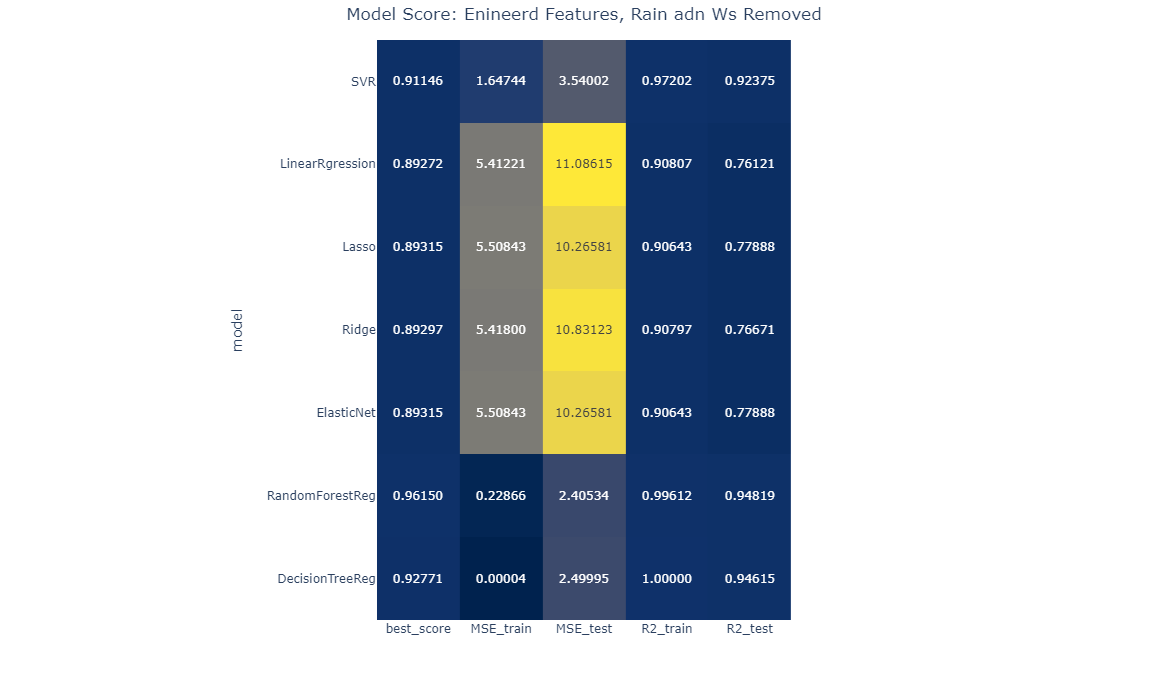

In [107]:
df2=model_scores.set_index('model')

######################################################

fig = px.imshow(df2,text_auto='.5f',color_continuous_scale='Cividis',
          title='Model Score: Enineerd Features, Rain adn Ws Removed')
fig.update_coloraxes(showscale=False)
fig.update_layout(margin=dict(t=40,pad=0),
                  title_x=0.5,
                  height=700,width=700,
                  paper_bgcolor = "rgba(0,0,0,0)",
                    plot_bgcolor = "rgba(0,0,0,0)",                  
                    margin_autoexpand=True,
                    font=dict(size = 12))

fig.update_yaxes(automargin=True)


fig.show()
#######################
pio.write_html(fig,file = '../Regression/tuned_models_raw4_4//model_scores.html')

# Feature Importance

In [32]:
dtcReg_model.best_estimator_.feature_importances_

array([1.84749672e-03, 2.04699508e-03, 1.02451693e-03, 7.81732273e-05,
       9.17567749e-01, 7.74350686e-02])

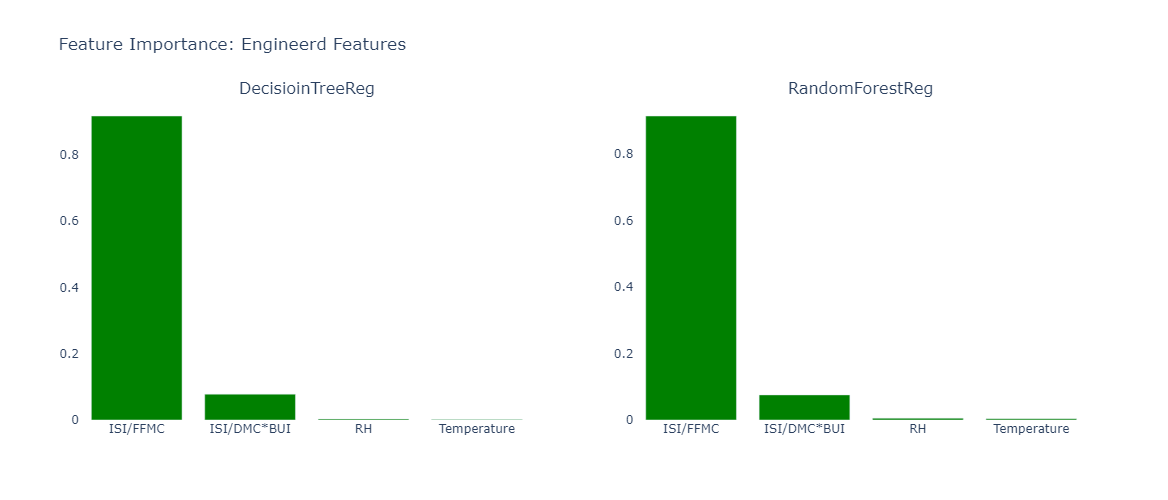

In [110]:
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.express as px
import plotly.io as pio
import pandas as pd



model = {"DecisioinTreeReg":dtcReg_model,'RandomForestReg':rfReg_model}
# Define the number of rows and columns for the subplot grid
num_rows = 1
num_cols = 2

# Create a subplot grid with the specified number of rows and columns
fig = sp.make_subplots(rows=num_rows, cols=num_cols,subplot_titles=list(model.keys()))

# Loop through each column in the dataframe and add a box plot to the subplot grid
for idx, col_name in enumerate(model):
    row_num = (idx // num_cols) + 1
    col_num = (idx % num_cols) + 1
    
    ###### Feature Imortance Dataframe ###############
    feature_importance = model.get(col_name).best_estimator_.feature_importances_

    feature_importance_df = pd.DataFrame({'feature': X_train_scaled_df.columns,
                                      'importance': feature_importance
                                     }).sort_values('importance', ascending=False)
    
    ############ Plotting Feature Importance ################
    
    fig.add_trace(px.bar(data_frame= feature_importance_df,x='feature',y='importance').data[0], row=row_num, col=col_num,)
    
    #########################################################
    
    # Set the title of the subplot grid
    fig.update_layout(height=500,width=1100, title='Feature Importance: Engineerd Features',
                      paper_bgcolor = "rgba(0,0,0,0)",
                      plot_bgcolor = "rgba(0,0,0,0)",                  
                     )
    fig.update_traces(marker_color='green')
# Show the plot
#fig.show()
###############################
fig.update_yaxes(showline=False,showgrid=False)
fig.update_xaxes(showline=False,showgrid=False)
##########################################
pio.write_html(fig,file = '../Regression/tuned_models_raw4_6//featureImportance.html',config= dict(displayModeBar = False))
fig.show()

# Model Scores Metrices For Output

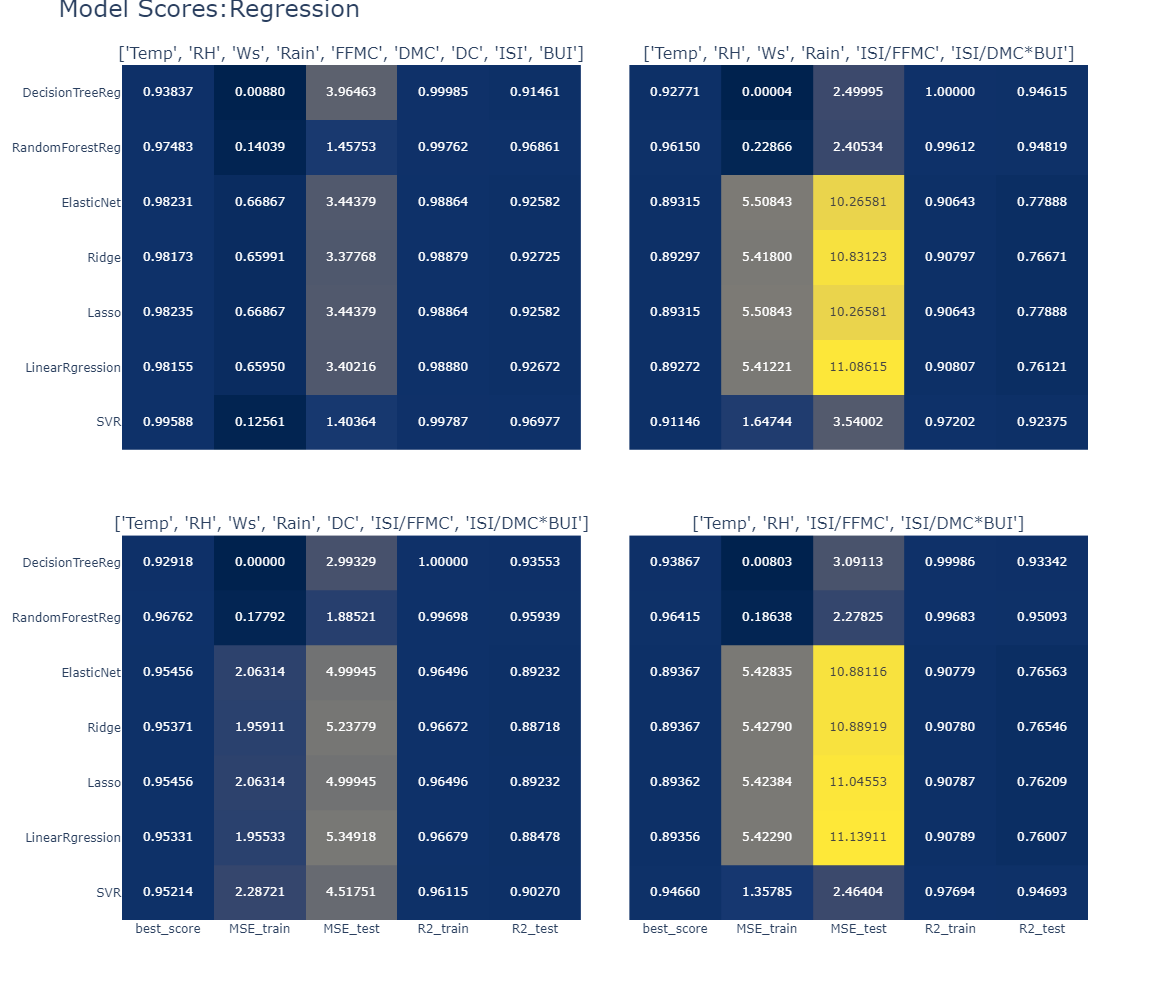

In [141]:

import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.express as px
import pandas as pd
import plotly.figure_factory as ff

df1 = pd.read_csv('../Regression/tuned_models_raw4_3/model_scores.csv',index_col='model')
df2 = pd.read_csv('../Regression/tuned_models_raw4_4/model_scores.csv',index_col='model')
df3 = pd.read_csv('../Regression/tuned_models_raw4_5/model_scores.csv',index_col='model')
df4 = pd.read_csv('../Regression/tuned_models_raw4_6/model_scores.csv',index_col='model')
#df2=model_scores.set_index('model')

# Create a sample dataframe


# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 2
##########
title1 = ['Temp', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI','BUI']
title2 = ['Temp', 'RH', 'Ws', 'Rain', 'ISI/FFMC', 'ISI/DMC*BUI']
title3 = ['Temp', 'RH', 'Ws', 'Rain', 'DC', 'ISI/FFMC', 'ISI/DMC*BUI']
title4 = ['Temp', 'RH', 'ISI/FFMC', 'ISI/DMC*BUI']


# Create a subplot grid with the specified number of rows and columns
fig = sp.make_subplots(rows=num_rows, cols=num_cols,
                       subplot_titles=[f"{title1}",f"{title2}",f"{title3}",f"{title4}"],
                       shared_yaxes=True,
                       shared_xaxes=True,
                       vertical_spacing=0.1,
                      horizontal_spacing=0.05)

fig.add_trace(px.imshow(df1,text_auto='.5f',color_continuous_scale='Cividis', title='').data[0],row=1, col=1)
fig.add_trace(px.imshow(df2,text_auto='.5f',color_continuous_scale='Cividis', title='').data[0],row=1, col=2)    
fig.add_trace(px.imshow(df3,text_auto='.5f',color_continuous_scale='Cividis', title='').data[0],row=2, col=1)    
fig.add_trace(px.imshow(df4,text_auto='.5f',color_continuous_scale='Cividis', title='').data[0],row=2, col=2)    



# Set the title of the subplot grid
fig.update_coloraxes(showscale=False)
fig.update_layout(margin=dict(t=65,pad=0),
                  title={
                        'text': 'Model Scores:Regression',
                        'y': 1,  # Adjust the y position of the title
                        'yanchor': 'top',  # Anchor the title to the top of the plot
                        'font': {'size': 24},  # Set the font size of the title
                        'pad': {'b': 100}  # Set the bottom margin of the title
                    },
                      
                  
                  
                  
                  coloraxis=dict(colorscale='Cividis'),
                  height=1000,width=1200,
                  paper_bgcolor = "rgba(0,0,0,0)",
                    plot_bgcolor = "rgba(0,0,0,0)",                  
                    margin_autoexpand=True,
                    font=dict(size = 12))

fig.update_yaxes(automargin=True)


fig.show()
pio.write_html(fig,file = '../Regression//model_scores.html')